# The SIR Model for Spread of Disease
Desy Nuryunarsih 19/10/2022

### The Freshman Plague in University of Nottingham
Every year at University of Nottingham, about 90 new students come to campus from around the country and the world. Most of them arrive healthy and happy, but usually at least one brings with them some kind of infectious disease. A few weeks later, predictably, some fraction of the incoming class comes down with what we call the “Freshman Plague”.

##### In this chapter we introduce a well-known model of infectious disease, the Kermack-McKendrick model, and use it to explain the progression of the disease over the course of the semester, predict the effect of possible interventions (like immunization) and design the most effective intervention campaign.

So far we have done our own modeling; that is, we’ve chosen physical systems, identified factors that seem important, and made decisions about how to represent them. In this chapter we start with an existing model and reverse-engineer it. Along the way, we consider the modeling decisions that went into it and identify its capabilities and limitations.

## The Kermack-McKendrick Model
The Kermack-McKendrick (KM) model is an example of an SIR model, so-named because it represents three categories of people:

##### S: People who are “susceptible”, that is, capable of contracting the disease if they come into contact with someone who is infected.

##### I: People who are “infectious”, that is, capable of passing along the disease if they come into contact with someone susceptible.

##### R: People who are “recovered”. In the basic version of the model, people who have recovered are considered to be no longer infectious and immune to reinfection. That is a reasonable model for some diseases, but not for others, so it should be on the list of assumptions to reconsider later.

### Let’s think about how the number of people in each category changes over time. 
Suppose we know that people with the disease are infectious for a period of 4 days, on average. If 100 people are infectious at a particular point in time, and we ignore the particular time each one became infected, we expect about 1 out of 4 to recover on any particular day.

Putting that a different way, if the time between recoveries is 4 days, the recovery rate is about 0.25 recoveries per day, which we’ll denote with the Greek letter gamma,Y, or the variable name gamma.

If the total number of people in the population is N , and the fraction currently infectious is i , the total number of recoveries we expect per day is YiN

### Now let’s think about the number of new infections. 
Suppose we know that each susceptible person comes into contact with 1 person every 3 days, on average, in a way that would cause them to become infected if the other person is infected. We’ll denote this contact rate with the Greek letter beta,B , or the variables name beta.

It’s probably not reasonable to assume that we know  ahead of time, but later we’ll see how to estimate it based on data from previous outbreaks.

If s is the fraction of the population that’s susceptible, sN is the number of susceptible people,BsN is the number of contacts per day, and BsiN is the number of those contacts where the other person is infectious.

### In summary:
##### The number of recoveries we expect per day is YiN ; dividing by N yields the fraction of the population that recovers in a day, which is Yi
##### The number of new infections we expect per day is BsiN  ; dividing by N yields the fraction of the population that gets infected in a day, which is Bsi
#### The KM model assumes that the population is closed; that is, no one arrives or departs, so the size of the population, , is constant.

#### The KM Equations
If we treat time as a continuous quantity, we can write differential equations that describe the rates of change for s,i,r and  (where  is the fraction of the population that has recovered):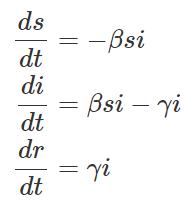

To avoid cluttering the equations, I leave it implied that s is a function of time,s(t), and likewise for i and r.

SIR models are examples of compartment models, so-called because they divide the world into discrete categories, or compartments, and describe transitions from one compartment to another. Compartments are also called stocks and transitions between them are called flows.

##### In this example, there are three stocks—susceptible, infectious, and recovered—and two flows—new infections and recoveries. Compartment models are often represented visually using stock and flow diagrams(see http://modsimpy.com/stock).
The following figure shows the stock and flow diagram for the KM model.
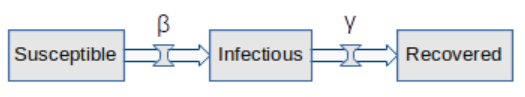
Stocks are represented by rectangles, flows by arrows. The widget in the middle of the arrows represents a valve that controls the rate of flow; the diagram shows the parameters that control the valves.

### Implementing the KM model
For a given physical system, there are many possible models, and for a given model, there are many ways to represent it. For example, we can represent an SIR model as a stock-and-flow diagram, as a set of differential equations, or as a Python program. The process of representing a model in these forms is called implementation. In this section, we implement the KM model in Python.

I’ll represent the initial state of the system using a State object with state variables s, i, and r; they represent the fraction of the population in each compartment.

###### We can initialize the State object with the number of people in each compartment; for example, here is the initial state with one infected student in a class of 90:

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#### The following Python code integrates these equations for a disease characterised by parameters β=0.2, 1/γ=10days in a population of N=1000 (perhaps 'flu in a school). The model is started with a single infected individual on day 0: I(0)=1. The plotted curves of S(t), I(t) and R(t) are styled to look a bit nicer than Matplotlib's defaults.

In [11]:
# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

In [12]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [13]:
# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

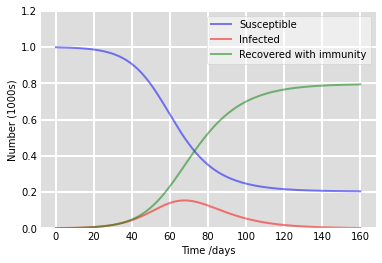

In [14]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()